**Importação de Bibliotecas**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

print("Bibliotecas importadas!")

Bibliotecas importadas!


**Coleta e Tratamento dos Dados**

In [36]:
print("Iniciando carregamento final...")

try:
    # Encontrar os 3 arquivos na pasta data
    path_pattern = '../data/*.parquet'
    file_list = glob.glob(path_pattern)
    
    if len(file_list) != 3:
        raise FileNotFoundError(f"ERRO: Foram encontrados {len(file_list)} arquivos .parquet na pasta ../data. Eram esperados 3.")
    
    print("Sucesso: 3 arquivos encontrados.")

    # Carregar os 3 arquivos primeiro na memória
    df1 = pd.read_parquet(file_list[0])
    df2 = pd.read_parquet(file_list[1])
    df3 = pd.read_parquet(file_list[2])
    dataframes = [df1, df2, df3]
    
    print("Sucesso: 3 DataFrames carregados na memória.")

    # Identificar qual DataFrame é qual, olhando as colunas
    for df in dataframes:
        if 'quantity' in df.columns and 'internal_product_id' in df.columns:
            df_transacoes = df
        elif 'zipcode' in df.columns:
            df_pdvs = df
        else:
            df_produtos = df
    
    print("Sucesso: DataFrames identificados e atribuídos às variáveis corretas.")

    # Unir (merge) os DataFrames usando as chaves corretas
    print("\nUnindo tabelas...")
    df_completo = pd.merge(df_transacoes, df_produtos, left_on='internal_product_id', right_on='produto', how='left')
    df_completo = pd.merge(df_completo, df_pdvs, left_on='internal_store_id', right_on='pdv', how='left')
    
    print("\n✅✅✅ SUCESSO! DADOS CARREGADOS E UNIDOS CORRETAMENTE! ✅✅✅")
    
    print("\n--- Informações do DataFrame final ---")
    df_completo.info(show_counts=True)
    
    print("\n--- Amostra dos dados ---")
    display(df_completo.head())
    display(df_completo.tail())

except Exception as e:
    print(f"⚠️ Ocorreu um erro: {e}")

Iniciando carregamento final...
Sucesso: 3 arquivos encontrados.
Sucesso: 3 DataFrames carregados na memória.
Sucesso: DataFrames identificados e atribuídos às variáveis corretas.

Unindo tabelas...

✅✅✅ SUCESSO! DADOS CARREGADOS E UNIDOS CORRETAMENTE! ✅✅✅

--- Informações do DataFrame final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560698 entries, 0 to 6560697
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   internal_store_id    6560698 non-null  object 
 1   internal_product_id  6560698 non-null  object 
 2   distributor_id       6560698 non-null  object 
 3   transaction_date     6560698 non-null  object 
 4   reference_date       6560698 non-null  object 
 5   quantity             6560698 non-null  float64
 6   gross_value          6560698 non-null  float64
 7   net_value            6560698 non-null  float64
 8   gross_profit         6560698 non-null  float64
 9   discount     

,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,descricao,tipos,label,subcategoria,marca,fabricante,pdv,premise,categoria_pdv,zipcode
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125000,37.890625,10.042625,3.950000,...,BUD LIGHT CHELADA FUEGO 15/25 CN,Package,Core,Specialty,Bud Light Chelada Fuego,AB Anheuser Busch Inc,7384367747233276219,Off Premise,Package/Liquor,80905.0
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250000,106.440002,24.732002,17.100000,...,MICHELOB ULTRA 18/12 CN,Package,Core,Lager,Michelob Ultra,AB Anheuser Busch Inc,3536908514005606262,Off Premise,Package/Liquor,80239.0
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625000,56.220001,14.124002,5.250000,...,BUD LIGHT LIME 18/12 CN,Package,Core,Lager,Bud Light Lime,AB Anheuser Busch Inc,3138231730993449825,Off Premise,Package/Liquor,80634.0
3,3681167389484217654,1401422983880045188,5,2022-09-11,2022-09-01,129.0,1037.160023,1037.160023,156.348026,479.880006,...,99 BUTTERSCOTCH 12/10/50ML 99PF,Allocated Spirits,None,Liqueurs & Cordials,99 Butterscotch,Sazerac Spirits,3681167389484217654,Off Premise,Package/Liquor,80226.0
4,7762413312337359369,6614994347738381720,4,2022-02-18,2022-02-01,1.0,26.230000,23.950241,6.550241,0.000000,...,NB VOODOO RANGER IMPERIAL IPA 15/19.2 CN,Package,Core,IPA,New Belgium Voodoo Ranger Imperial IPA,NB New Belgium,7762413312337359369,Off Premise,Convenience,30096.0


,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,...,descricao,tipos,label,subcategoria,marca,fabricante,pdv,premise,categoria_pdv,zipcode
6560693,1439579822593789678,2523145330235258825,4,2022-12-06,2022-12-01,3.0,63.000000,61.379761,20.879761,0.0,...,DRY COUNTY OLD FASHIONED 750ML,Distilled Spirits-Domest,Discontinued,Ready-to-Drink,Dry County Old Fashioned,Dry County Spirits,1439579822593789678,Off Premise,Package/Liquor,30071.0
6560694,2357589266242432199,3148628429396585683,4,2022-05-20,2022-05-01,1.0,12.300000,12.300000,3.650000,2.8,...,SPARK ICE + CAFFEINE BLACK RASPBERRY 12/16 CN,Non Alcohol,Core,Water,Sparkling Ice + Caffeine Black Raspberry,Talking Rain,2357589266242432199,Off Premise,Grocery,30076.0
6560695,7245187752757348055,6668439675743950745,4,2022-08-17,2022-08-01,1.0,33.849998,31.570240,10.191240,0.0,...,SPATEN PREMIUM LAGER 4/6/12 LNNR,Package,None,Lager,Spaten Premium Lager,AB Anheuser Busch Inc,7245187752757348055,Off Premise,Grocery,30121.0
6560696,8952609383990245450,3894706280449257667,5,2022-02-03,2022-02-01,4.0,74.556000,73.655998,17.991999,15.6,...,BUSCH LIGHT 30/12 CN,Package,Core,Lager,Busch Light,AB Anheuser Busch Inc,8952609383990245450,Off Premise,Grocery,80602.0
6560697,815150310325179165,3479075165556992938,4,2022-11-30,2022-11-01,2.0,56.060001,51.500484,14.612485,0.0,...,GOOSE ISLAND TROPICAL BEER HUG 15/19.2 CN,Package,Core,IPA,Goose Island Tropical Beer Hug,AB Anheuser Busch Inc,815150310325179165,Off Premise,Convenience,30058.0


In [37]:
# CÉLULA DE TRATAMENTO DE DADOS NULOS

print("--- Contagem de Nulos ANTES do Tratamento ---")
print(df_completo.isnull().sum())

# Tratando as colunas de PRODUTOS
# Preenchemos os nulos com uma categoria 'nao_informado'
df_completo['label'].fillna('nao_informado', inplace=True)
df_completo['subcategoria'].fillna('nao_informado', inplace=True)
print("\nColunas 'label' e 'subcategoria' tratadas.")

# Tratando as colunas de PDVs
# Para essas colunas, usaremos a categoria 'desconhecido'
colunas_pdv = ['pdv', 'premise', 'categoria_pdv', 'zipcode']
for coluna in colunas_pdv:
    if df_completo[coluna].dtype == 'object':
        # Se for texto, preenche com 'desconhecido'
        df_completo[coluna].fillna('desconhecido', inplace=True)
    else:
        # Se for número (como pdv ou zipcode), preenche com 0
        df_completo[coluna].fillna(0, inplace=True)

print("Colunas de PDV tratadas.")

# Verificação Final
print("\n--- Contagem de Nulos DEPOIS do Tratamento ---")
print(df_completo.isnull().sum())

--- Contagem de Nulos ANTES do Tratamento ---
internal_store_id           0
internal_product_id         0
distributor_id              0
transaction_date            0
reference_date              0
quantity                    0
gross_value                 0
net_value                   0
gross_profit                0
discount                    0
taxes                       0
produto                     0
categoria                   0
descricao                   0
tipos                       0
label                  526953
subcategoria            10312
marca                       0
fabricante                  0
pdv                     45582
premise                 45582
categoria_pdv           45582
zipcode                 45582
dtype: int64


/tmp/ipykernel_4302/1999614673.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completo['label'].fillna('nao_informado', inplace=True)
/tmp/ipykernel_4302/1999614673.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr


Colunas 'label' e 'subcategoria' tratadas.


/tmp/ipykernel_4302/1999614673.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completo[coluna].fillna('desconhecido', inplace=True)
/tmp/ipykernel_4302/1999614673.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Colunas de PDV tratadas.

--- Contagem de Nulos DEPOIS do Tratamento ---
internal_store_id      0
internal_product_id    0
distributor_id         0
transaction_date       0
reference_date         0
quantity               0
gross_value            0
net_value              0
gross_profit           0
discount               0
taxes                  0
produto                0
categoria              0
descricao              0
tipos                  0
label                  0
subcategoria           0
marca                  0
fabricante             0
pdv                    0
premise                0
categoria_pdv          0
zipcode                0
dtype: int64


In [38]:
# TRATAMENTO DE DATA E CRIAÇÃO DE FEATURES

# Garantir que a coluna 'transaction_date' é do tipo datetime
print("Convertendo a coluna de data...")
# Usamos .reset_index() primeiro para garantir que 'transaction_date' é uma coluna
df_completo.reset_index(inplace=True, drop=True) 
df_completo['transaction_date'] = pd.to_datetime(df_completo['transaction_date'])
print("Conversão concluída.")

# Definir a coluna de data como o índice do DataFrame
print("\nDefinindo a data como o novo índice...")
df_completo.set_index('transaction_date', inplace=True)
df_completo.sort_index(inplace=True)
print(f"O novo índice é do tipo: {type(df_completo.index)}")

# Agora, criar as features a partir do DatetimeIndex
print("\nCriando features de tempo a partir do índice...")
df_completo['semana_do_ano'] = df_completo.index.isocalendar().week
df_completo['dia_da_semana'] = df_completo.index.day_name()
df_completo['mes'] = df_completo.index.month
df_completo['dia_do_mes'] = df_completo.index.day

print("\n✅ Sucesso! Features de tempo criadas.")
display(df_completo[['semana_do_ano', 'dia_da_semana', 'mes', 'dia_do_mes']].head())

Convertendo a coluna de data...
Conversão concluída.

Definindo a data como o novo índice...
O novo índice é do tipo: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Criando features de tempo a partir do índice...

✅ Sucesso! Features de tempo criadas.


,semana_do_ano,dia_da_semana,mes,dia_do_mes
transaction_date,,,,
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1
2022-01-01,52,Saturday,1,1


**Análise Exploratória dos Dados**

Agregando as vendas totais por semana...
Plotando o gráfico de vendas semanais...


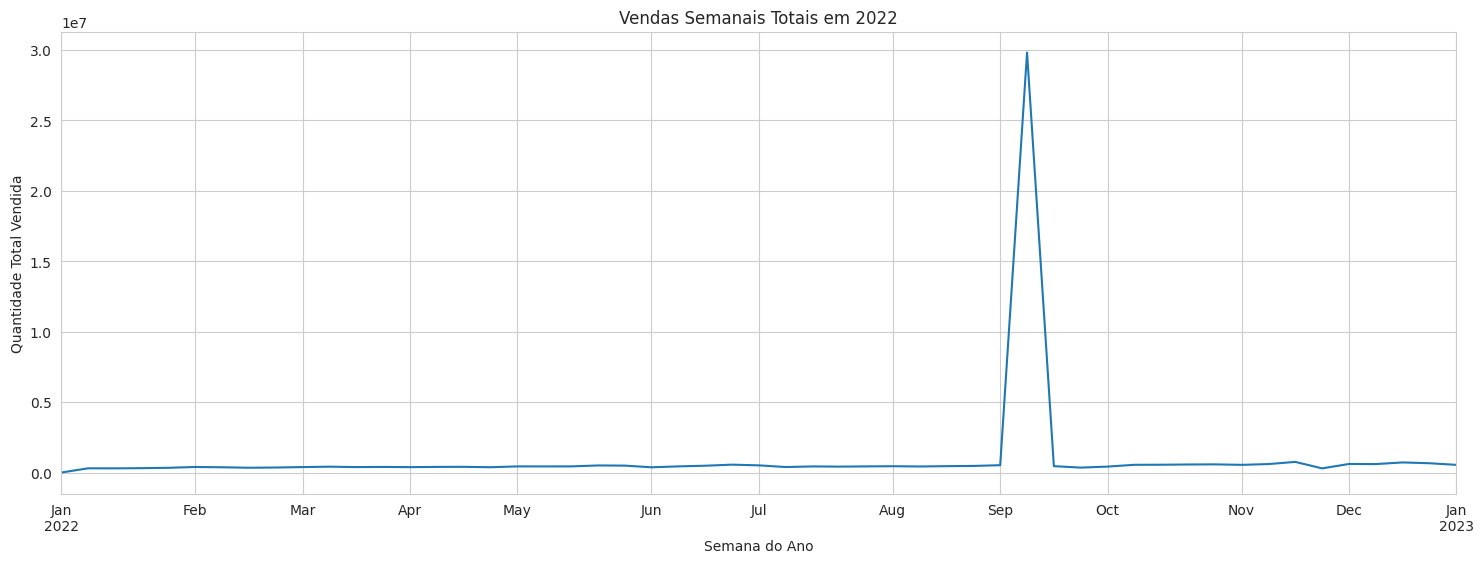

In [39]:
# Configurando o estilo e tamanho dos gráficos
plt.rcParams['figure.figsize'] = (18, 6)
sns.set_style('whitegrid')

print("Agregando as vendas totais por semana...")

# O método .resample('W') agrupa nosso índice de data por semana ('W' de Weekly) 
# e nos permite fazer uma operação, como somar (.sum()).
vendas_semanais = df_completo['quantity'].resample('W').sum()

print("Plotando o gráfico de vendas semanais...")

# Agora, simplesmente plotamos o resultado
ax = vendas_semanais.plot(title='Vendas Semanais Totais em 2022')
ax.set_xlabel('Semana do Ano')
ax.set_ylabel('Quantidade Total Vendida')
plt.show()

In [40]:
# Encontra a data exata em que ocorreu o pico de vendas
data_do_pico = vendas_semanais.idxmax()
print(f"O pico de vendas ocorreu na semana de: {data_do_pico.date()}")

# Filtra o DataFrame completo para conter apenas os dados dessa semana específica
# Pegamos a data do pico e subtraímos 6 dias para ter a semana completa
semana_do_pico_df = df_completo[(df_completo.index >= data_do_pico - pd.Timedelta(days=6)) & (df_completo.index <= data_do_pico)]

print(f"\nAnalisando as {len(semana_do_pico_df)} transações da semana do pico...")

# Pergunta 1: Quais produtos foram os mais vendidos nessa semana?
top_produtos_pico = semana_do_pico_df.groupby('descricao')['quantity'].sum().nlargest(10)
print("\n--- Top 10 Produtos na Semana do Pico ---")
print(top_produtos_pico)

# Pergunta 2: Quais PDVs (lojas) foram os que mais venderam?
top_pdvs_pico = semana_do_pico_df.groupby('pdv')['quantity'].sum().nlargest(10)
print("\n--- Top 10 PDVs na Semana do Pico ---")
print(top_pdvs_pico)

O pico de vendas ocorreu na semana de: 2022-09-11

Analisando as 421668 transações da semana do pico...

--- Top 10 Produtos na Semana do Pico ---
descricao
SKOL PREMIUM VODKA 6/1.75L 80PF        872622.999799
FIREBALL 24/375ML PET 66PF             824693.999923
SKOL PREMIUM VODKA 24/375ML 80PF       767813.999780
FIREBALL 48/200ML PET 66PF             692375.000058
BUFFALO TRACE BOURBON 12/750ML 90PF    635408.993273
TAAKA VODKA 6/1.75L PET 80PF           556852.999882
FIREBALL 12/750ML PET 66PF             451412.000445
SKOL PREMIUM VODKA 48/200ML 80PF       436046.999854
FIREBALL 12/10/50ML 66PF               426119.999988
PAUL MASSON BRANDY VS 12/750ML 80PF    417657.000124
Name: quantity, dtype: float64

--- Top 10 PDVs na Semana do Pico ---
pdv
desconhecido           215674.664223
6491855528940268514    176202.570881
3025867614395044464    170252.533326
8723723113467008071    132026.311978
4304226119364518876    130715.999814
9171644843739559005    126486.749948
13658391462786417

Número de linhas ANTES da limpeza: 6560698
Número de linhas DEPOIS da limpeza: 6139030
Foram removidas 421668 linhas.

Plotando o gráfico com os dados limpos...


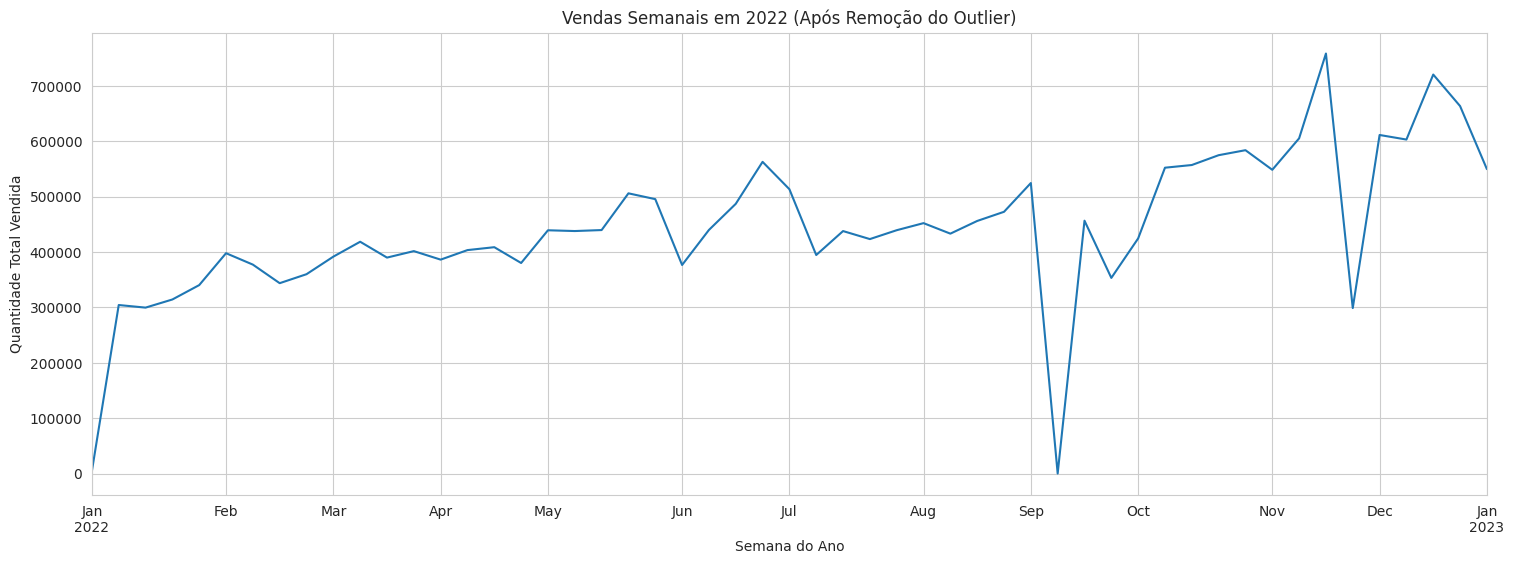

In [41]:
print(f"Número de linhas ANTES da limpeza: {len(df_completo)}")

# Encontra a data do pico de vendas
vendas_semanais_bruto = df_completo['quantity'].resample('W').sum()
data_do_pico = vendas_semanais_bruto.idxmax()

# Define o início e o fim da semana anômala
inicio_semana_anomala = data_do_pico - pd.Timedelta(days=6)
fim_semana_anomala = data_do_pico

# Filtra o DataFrame, mantendo apenas as linhas FORA da semana do pico
df_limpo = df_completo[(df_completo.index < inicio_semana_anomala) | (df_completo.index > fim_semana_anomala)]

print(f"Número de linhas DEPOIS da limpeza: {len(df_limpo)}")
print(f"Foram removidas {len(df_completo) - len(df_limpo)} linhas.")

# Verificação Visual
print("\nPlotando o gráfico com os dados limpos...")
vendas_semanais_limpo = df_limpo['quantity'].resample('W').sum()

ax = vendas_semanais_limpo.plot(title='Vendas Semanais em 2022 (Após Remoção do Outlier)')
ax.set_xlabel('Semana do Ano')
ax.set_ylabel('Quantidade Total Vendida')
plt.show()

Gerando gráfico da tendência semanal (com interpolação para corrigir a visualização)...


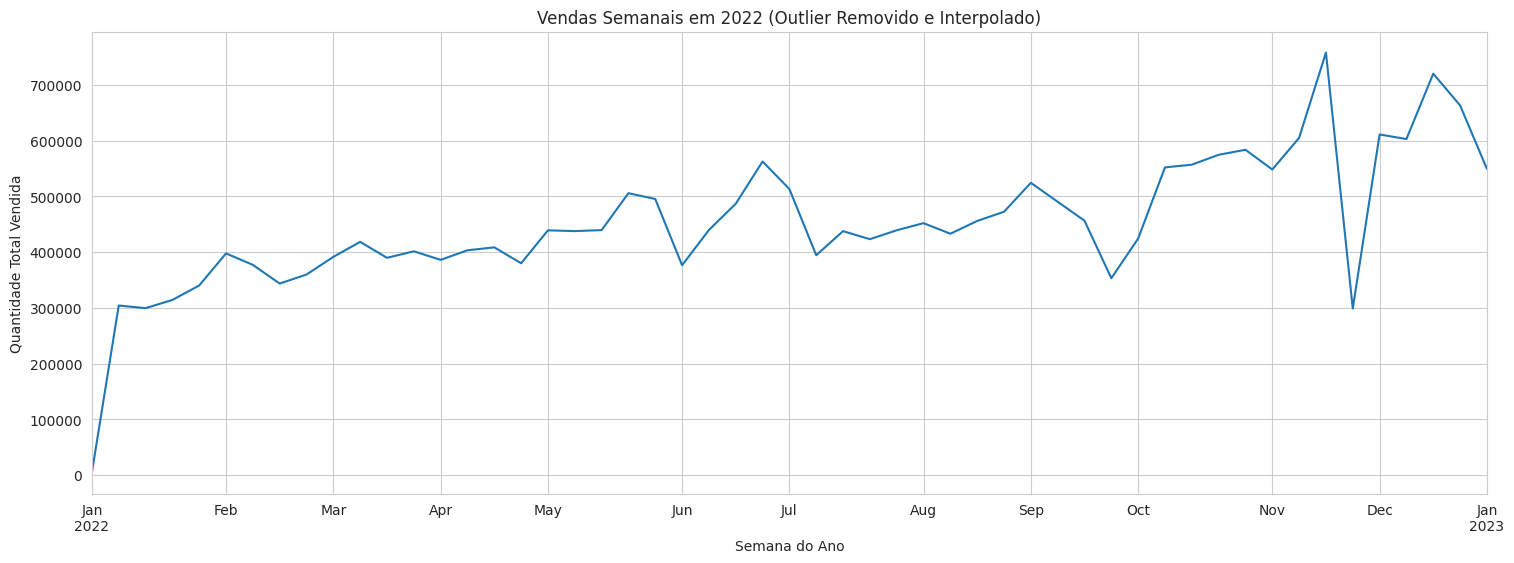

In [ ]:
print("Gerando gráfico da tendência semanal (com interpolação para corrigir a visualização)...")

# 1. Agrega os dados semanais a partir do df_limpo. Isso cria a série com o "buraco" de valor zero.
vendas_semanais = df_limpo['quantity'].resample('W').sum()

# 2. Substituímos o zero (que é um artefato da nossa limpeza) por NaN, que significa "dado ausente".
vendas_semanais[vendas_semanais == 0] = np.nan

# 3. Criamos uma NOVA variável, interpolada, APENAS para o gráfico.
vendas_semanais_interpolado = vendas_semanais.interpolate(method='linear')

# 4. Plotamos a versão corrigida, que é visualmente mais honesta.
ax = vendas_semanais_interpolado.plot(title='Vendas Semanais em 2022 (Outlier Removido e Interpolado)')
ax.set_xlabel('Semana do Ano')
ax.set_ylabel('Quantidade Total Vendida')
plt.show()

--- Análise por Categoria de Produto ---


/tmp/ipykernel_4302/1003421272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria_produto.values, y=vendas_por_categoria_produto.index, palette='viridis')


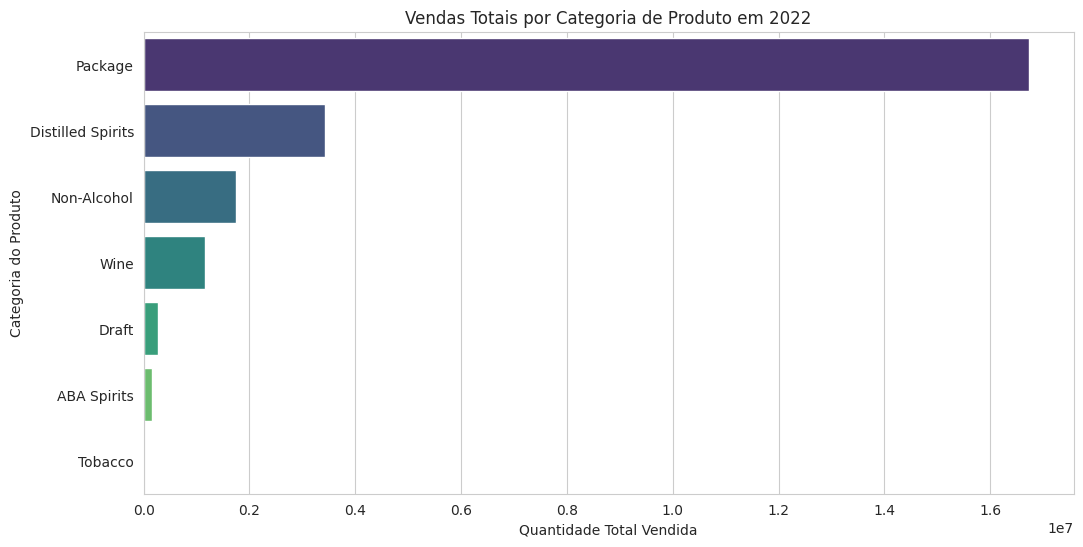


 categoria
Package              1.674114e+07
Distilled Spirits    3.433854e+06
Non-Alcohol          1.749702e+06
Wine                 1.153225e+06
Draft                2.751432e+05
Name: quantity, dtype: float64


--- Análise por Categoria de Ponto de Venda (PDV) ---


/tmp/ipykernel_4302/1003421272.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria_pdv.values, y=vendas_por_categoria_pdv.index, palette='plasma')


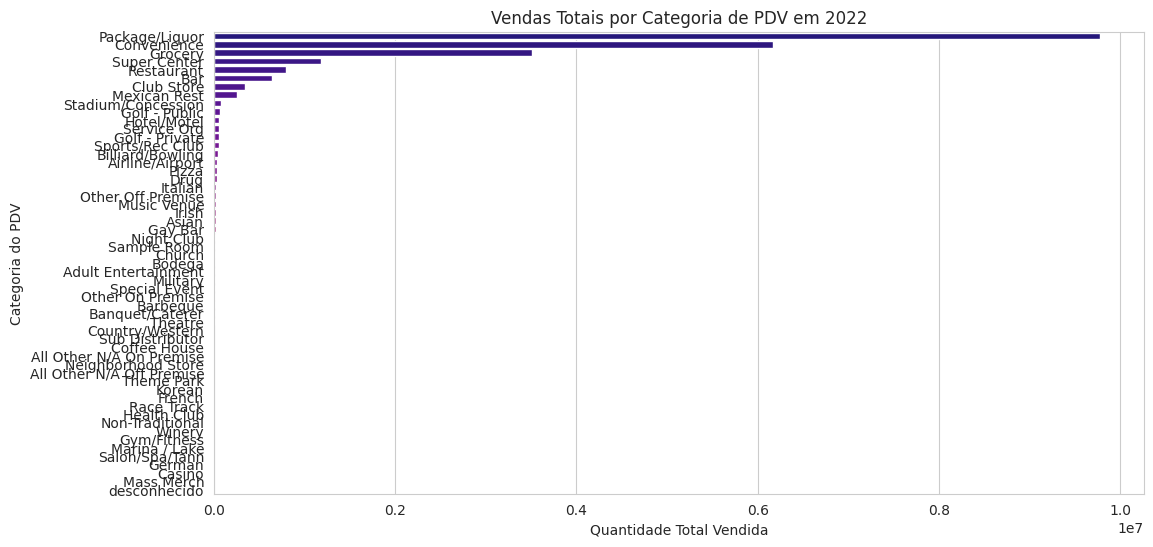


 categoria_pdv
Package/Liquor    9.773180e+06
Convenience       6.167953e+06
Grocery           3.514660e+06
Super Center      1.186345e+06
Restaurant        7.934764e+05
Name: quantity, dtype: float64


In [ ]:
# Garante que temos o df_limpo
# Se você estiver em um novo notebook, precisará rodar a célula de limpeza primeiro.

# --- Análise por Categoria de Produto ---
print("--- Análise por Categoria de Produto ---")
vendas_por_categoria_produto = df_limpo.groupby('categoria')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_categoria_produto.values, y=vendas_por_categoria_produto.index, palette='viridis')
plt.title('Vendas Totais por Categoria de Produto em 2022')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Categoria do Produto')
plt.show()

print("\n", vendas_por_categoria_produto.head(5))


# --- Análise por Categoria de PDV ---
print("\n\n--- Análise por Categoria de Ponto de Venda (PDV) ---")
vendas_por_categoria_pdv = df_limpo.groupby('categoria_pdv')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_categoria_pdv.values, y=vendas_por_categoria_pdv.index, palette='plasma')
plt.title('Vendas Totais por Categoria de PDV em 2022')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Categoria do PDV')
plt.show()

print("\n", vendas_por_categoria_pdv.head(5))